<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Anthony_GM_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 + 3

5

In [0]:
#I made this change

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

###LOADING DATA

In [0]:
# TODO - your code here

import pandas as pd
data_fl = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv')
print(data_fl.shape)
data_fl.head()

(123, 2)


,team,elo
0,RII,1503.947
1,STP,1300.000
2,BFF,1478.004
3,WBU,1300.000
4,RCH,1503.420


In [0]:
data_fl.columns

Index(['team', 'elo'], dtype='object')

In [0]:
data_fl.sort_values(by = ['elo'], ascending = True, na_position = 'first')[:12]

,team,elo
122,HOU,1300.0
84,PIT,1300.0
83,RED,1300.0
82,WSH,1300.0
81,CLI,1300.0
80,BKN,1300.0
116,CIN,1300.0
117,TB,1300.0
76,DWL,1300.0
74,BRL,1300.0


In [0]:

#READING FILES
#Step 1

!ls sample_data


anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
#Step 2

!wget https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv

--2019-08-07 14:15:35--  https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415 (1.4K) [text/plain]
Saving to: ‘initial_elos.csv.1’

initial_elos.csv.1  100%[===================>]   1.38K  --.-KB/s    in 0s      

2019-08-07 14:15:35 (196 MB/s) - ‘initial_elos.csv.1’ saved [1415/1415]



In [0]:
!ls

initial_elos.csv  initial_elos.csv.1  sample_data


In [0]:
data_fl2 = pd.read_csv('initial_elos.csv')
print(data_fl2.head())

  team       elo
0  RII  1503.947
1  STP  1300.000
2  BFF  1478.004
3  WBU  1300.000
4  RCH  1503.420


In [0]:
print(data_fl2.shape)

(123, 2)


In [0]:
data_fl2.nlargest(12, 'elo')

,team,elo
77,TOR,1505.000
61,TOL,1504.938
7,COL,1504.908
11,CBD,1504.688
51,MNN,1504.688
78,SIS,1504.298
0,RII,1503.947
4,RCH,1503.420
13,AKR,1503.420
50,CCL,1502.630


###BRIEF DATA ANALYSIS

In [0]:
import numpy as np

In [0]:
team_mean = np.mean(data_fl2)
print(team_mean)

elo    1342.140805
dtype: float64


In [0]:
data_fl2['largest_team'] = data_fl2['elo'] >= 1342



In [0]:
data_fl2[:25]

,team,elo,largest_team
0,RII,1503.947,True
1,STP,1300.000,False
2,BFF,1478.004,True
3,WBU,1300.000,False
4,RCH,1503.420,True
5,ABU,1300.000,False
6,DAY,1493.002,True
7,COL,1504.908,True
8,MUN,1478.004,True
9,CHI,1368.333,True


In [0]:

#Using a different mehod to get true or false
data_fl2['larger_team'] = np.where(data_fl2['elo'] > 1000, 'Yes', 'No')

data_fl2.head()

,team,elo,largest_team,larger_team
0,RII,1503.947,True,Yes
1,STP,1300.000,False,Yes
2,BFF,1478.004,True,Yes
3,WBU,1300.000,False,Yes
4,RCH,1503.420,True,Yes


In [0]:
data_fl2['team_size'] = np.where(data_fl2['elo'] < 1389, "Low",
                        np.where(data_fl2['elo'] <= 1439, "Medium",
                        np.where(data_fl2['elo'] > 1490, "High", "Moderate")))
print(data_fl2)

    team       elo  largest_team larger_team team_size
0    RII  1503.947          True         Yes      High
1    STP  1300.000         False         Yes       Low
2    BFF  1478.004          True         Yes  Moderate
3    WBU  1300.000         False         Yes       Low
4    RCH  1503.420          True         Yes      High
5    ABU  1300.000         False         Yes       Low
6    DAY  1493.002          True         Yes      High
7    COL  1504.908          True         Yes      High
8    MUN  1478.004          True         Yes  Moderate
9    CHI  1368.333          True         Yes       Low
10   MUT  1300.000         False         Yes       Low
11   CBD  1504.688          True         Yes      High
12   PTQ  1300.000         False         Yes       Low
13   AKR  1503.420          True         Yes      High
14   WHE  1300.000         False         Yes       Low
15   DHR  1499.667          True         Yes      High
16   CLP  1300.000         False         Yes       Low
17   CHT  

In [0]:
data_fl2.team_size.value_counts()

Low         95
High        15
Moderate     7
Medium       6
Name: team_size, dtype: int64

###PLOTTING THE DATA

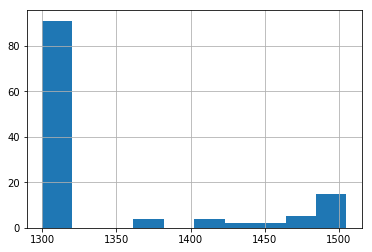

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot a hist
data_fl2.elo.hist(bins = 10)

**NEW: COUNTRIES DATA**

In [0]:
drinks = pd.read_csv('https://raw.githubusercontent.com/datasets/five-thirty-eight-datasets/master/datasets/alcohol-consumption/data/drinks.csv')
print(drinks.shape)


drinks.head()


(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,afghanistan,0,0,0,0.0
1,albania,89,132,54,4.9
2,algeria,25,0,14,0.7
3,andorra,245,138,312,12.4
4,angola,217,57,45,5.9


In [0]:
??str.capitalize

In [0]:
countries = pd.read_csv('https://raw.githubusercontent.com/Anthonyyoyo/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)

countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
countries[['name', 'region', 'sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [0]:
df = data_fl2.join(countries[['name', 'region', 'sub-region']], how = 'left')
print(df.shape)
df.head(20)

(123, 8)


,team,elo,largest_team,larger_team,team_size,name,region,sub-region
0,RII,1503.947,True,Yes,High,Afghanistan,Asia,Southern Asia
1,STP,1300.000,False,Yes,Low,Åland Islands,Europe,Northern Europe
2,BFF,1478.004,True,Yes,Moderate,Albania,Europe,Southern Europe
3,WBU,1300.000,False,Yes,Low,Algeria,Africa,Northern Africa
4,RCH,1503.420,True,Yes,High,American Samoa,Oceania,Polynesia
5,ABU,1300.000,False,Yes,Low,Andorra,Europe,Southern Europe
6,DAY,1493.002,True,Yes,High,Angola,Africa,Sub-Saharan Africa
7,COL,1504.908,True,Yes,High,Anguilla,Americas,Latin America and the Caribbean
8,MUN,1478.004,True,Yes,Moderate,Antarctica,NaN,NaN
9,CHI,1368.333,True,Yes,Low,Antigua and Barbuda,Americas,Latin America and the Caribbean


In [0]:
#We can also use df.merge

??df.merge

In [71]:
#Since the elements in the country column of drinks are all lower case and the elements of name column in country dataset are capitalized. It will lead to a clash. Thus capitalize country column in drinks dataset

drinks['country'] = drinks['country'].str.capitalize()
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [72]:
df = pd.merge(drinks, countries[['name', 'region', 'sub-region']], how = 'left', left_on='country', right_on='name')
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,Angola,Africa,Sub-Saharan Africa
5,Antigua & barbuda,102,128,45,4.9,NaN,NaN,NaN
6,Argentina,193,25,221,8.3,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,Austria,Europe,Western Europe


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 8 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
name                            146 non-null object
region                          146 non-null object
sub-region                      146 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 13.6+ KB


In [0]:


df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
name                            47
region                          47
sub-region                      47
dtype: int64

In [0]:
df.isna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,name,region,sub-region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [0]:
df.total_litres_of_pure_alcohol > 5

0      False
1      False
2      False
3       True
4       True
5      False
6       True
7      False
8       True
9       True
10     False
11      True
12     False
13     False
14      True
15      True
16      True
17      True
18     False
19     False
20     False
21     False
22      True
23      True
24     False
25      True
26     False
27      True
28     False
29     False
       ...  
163     True
164    False
165     True
166     True
167    False
168    False
169     True
170    False
171    False
172    False
173    False
174     True
175    False
176    False
177    False
178    False
179     True
180     True
181    False
182     True
183     True
184     True
185     True
186    False
187    False
188     True
189    False
190    False
191    False
192    False
Name: total_litres_of_pure_alcohol, Length: 193, dtype: bool

In [0]:
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,name,region,sub-region
5,Antigua & barbuda,102,128,45,4.9,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,NaN,NaN,NaN
21,Bosnia-herzegovina,76,173,8,4.6,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,NaN,NaN,NaN
26,Burkina faso,25,7,7,4.3,NaN,NaN,NaN
28,Cote d'ivoire,37,1,7,4.0,NaN,NaN,NaN
29,Cabo verde,144,56,16,4.0,NaN,NaN,NaN
33,Central african republic,17,2,1,1.8,NaN,NaN,NaN
40,Cook islands,0,254,74,5.9,NaN,NaN,NaN
41,Costa rica,149,87,11,4.4,NaN,NaN,NaN


In [0]:

drinks[drinks.country =='USA'] = 'United States of America'

In [0]:
#BAD Practice

drinks.country.iloc[184] = 'United States of America'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#Proper Way

drinks.at[184, 'country'] = 'United States of America'

In [0]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
Name: 184, dtype: object

In [0]:
df.region.value_counts()

Africa      41
Asia        36
Europe      35
Americas    24
Oceania     10
Name: region, dtype: int64

In [0]:
df['sub-region'].value_counts()

Sub-Saharan Africa                 35
Latin America and the Caribbean    23
Western Asia                       14
Southern Europe                    11
Northern Europe                     9
Western Europe                      8
South-eastern Asia                  7
Eastern Europe                      7
Southern Asia                       7
Northern Africa                     6
Central Asia                        5
Polynesia                           4
Eastern Asia                        3
Micronesia                          3
Melanesia                           2
Australia and New Zealand           1
Northern America                    1
Name: sub-region, dtype: int64

In [0]:
df.groupby('region').beer_servings.mean()

region
Africa       59.780488
Americas    146.625000
Asia         35.750000
Europe      216.085714
Oceania     107.000000
Name: beer_servings, dtype: float64

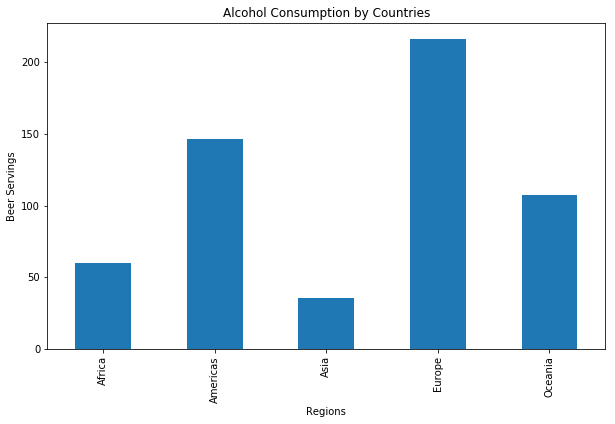

In [52]:
df.groupby('region').beer_servings.mean().plot(kind='bar', figsize=(10, 6))
plt.title('Alcohol Consumption by Countries')
plt.xlabel('Regions')
plt.ylabel('Beer Servings')
plt.show()

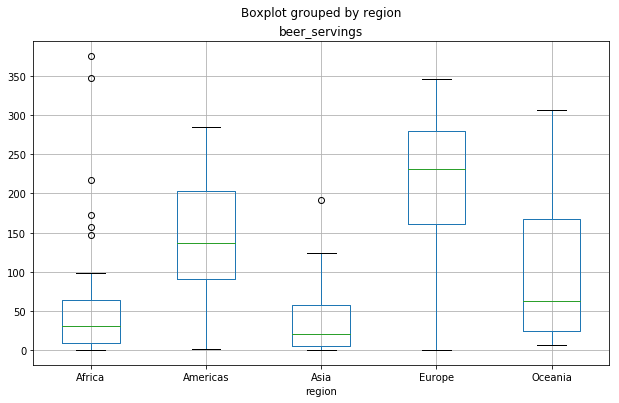

In [54]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

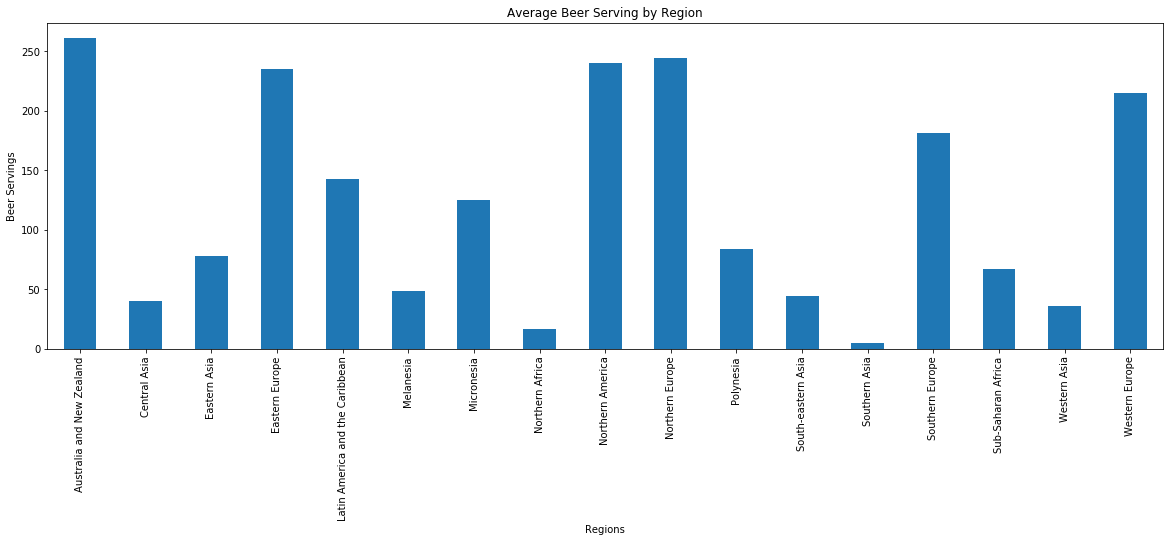

In [57]:
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize=(20, 6))
plt.title('Average Beer Serving by Region')
plt.xlabel('Regions')
plt.ylabel('Beer Servings')
plt.show()

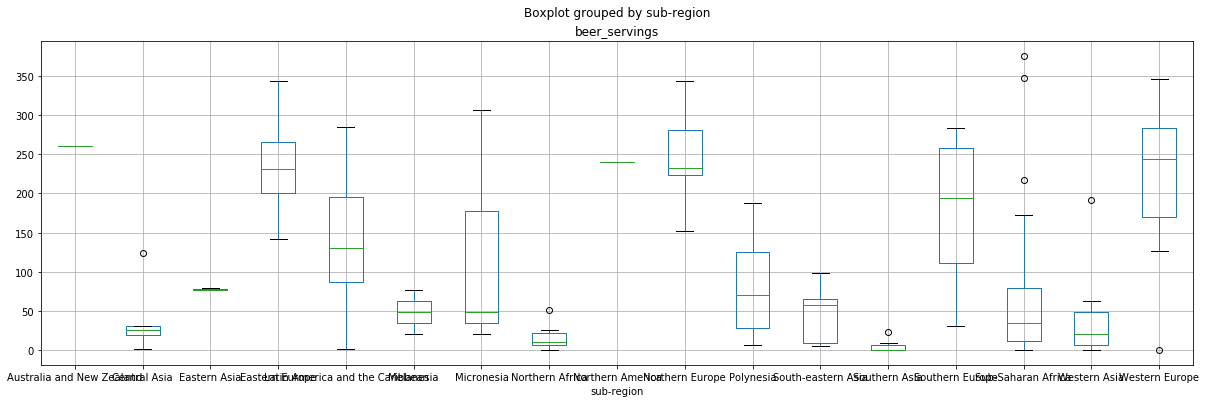

In [61]:
df.boxplot(column='beer_servings', by='sub-region', figsize=(20,6))
plt.show()

In [0]:
import seaborn as sns


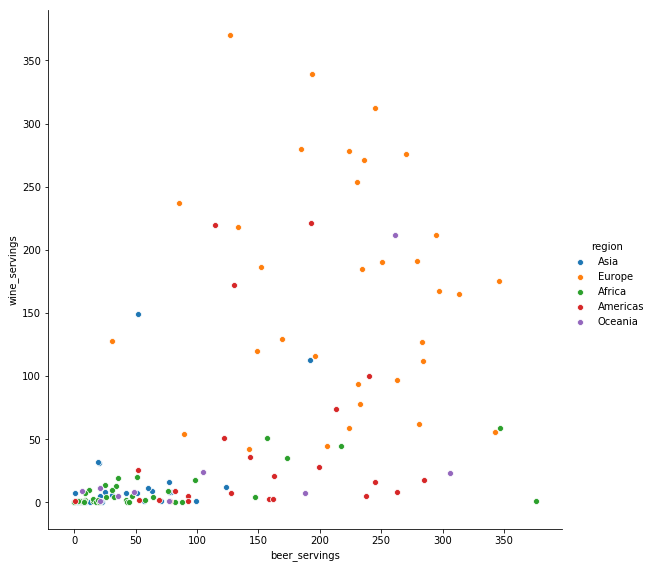

In [65]:
sns.pairplot(x_vars = ['beer_servings'], y_vars = ['wine_servings'], data=df, hue='region', height = 8)
plt.show()

In [73]:
df = df.dropna(subset=['region'])
df.shape

(146, 8)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.